In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from skidl.pyspice import *
print(lib_search_paths)

{'kicad': ['.'], 'skidl': ['.', '/usr/local/lib/python3.6/site-packages/skidl/libs'], 'spice': ['.']}


   V    I (mA)
  0.00  -0.00
  0.10   0.03
  0.20   0.07
  0.30   0.10
  0.40   0.13
  0.50   0.17
  0.60   0.20
  0.70   0.23
  0.80   0.27
  0.90   0.30
  1.00   0.33
  1.10   0.37
  1.20   0.40
  1.30   0.43
  1.40   0.47
  1.50   0.50
  1.60   0.53
  1.70   0.57
  1.80   0.60
  1.90   0.63
  2.00   0.67
  2.10   0.70
  2.20   0.73
  2.30   0.77
  2.40   0.80
  2.50   0.83
  2.60   0.87
  2.70   0.90
  2.80   0.93
  2.90   0.97
  3.00   1.00



No errors or warnings found during netlist generation.



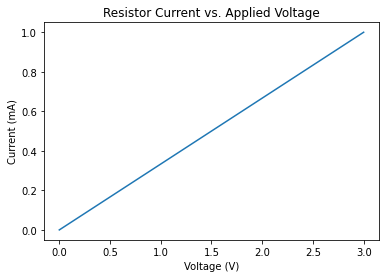

In [4]:
reset()  # This will clear any previously defined circuitry.

# Create and interconnect the components.
vs = V(ref='VS', dc_value = 3 @ u_V)  # Create a voltage source named "VS" with an initial value of 3 volt.
r1 = R(value = 1 @ u_kOhm)            # Create a 1 Kohm resistor.
r2 = R(value = 2.0 @ u_kOhm)            # Create a 2.0 Kohm resistor.
r3 = R(value = 2.0 @ u_kOhm)            # Create a 2.0 Kohm resistor.
r4 = R(value = 1 @ u_kOhm)            # Create a 1 Kohm resistor.
vs['p'] += r1[1]       # Connect one end of the first resistor to the positive terminal of the voltage source.
r1[2] += r2[1], r3[1]       # Connect other end of the first resistor to the second and third resistors.
r4[1] += r2[2], r3[2]       # Connect the other ends of the second and third resistors to one end of r4
gnd += vs['n'], r4[2]       # Connect the ground to the negative end of the battery and to the other end of r4

circ = generate_netlist()              # Translate the SKiDL code into a PyCircuit Circuit object.
sim = circ.simulator()                 # Create a simulator for the Circuit object.
dc_vals = sim.dc(VS=slice(0, 3, 0.1))  # Run a DC simulation where the voltage ramps from 0 to 1V by 0.1V increments.

# Get the voltage applied to the resistor and the current coming out of the voltage source.
voltage = dc_vals[node(vs['p'])]       # Get the voltage applied by the positive terminal of the source.
current = -dc_vals['VS']               # Get the current coming out of the positive terminal of the voltage source.

# Print a table showing the current through the resistor for the various applied voltages.
print('{:^7s}{:^7s}'.format('V', ' I (mA)'))
print('='*15)
for v, i in zip(voltage.as_ndarray(), current.as_ndarray()*1000):
    print('{:6.2f} {:6.2f}'.format(v, i))

# Create a plot of the current (Y coord) versus the applied voltage (X coord).
figure = plt.figure(1)
plt.title('Resistor Current vs. Applied Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (mA)')
plt.plot(voltage, current*1000) # Plot X=voltage and Y=current (in milliamps, so multiply it by 1000).
plt.show()